# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

#### 
El primer paso es importar pandas, asi como leer cada archivo y guardarlo por separado. Una vez se hayan guardado sera leerlos y revisar su estructura con info(), para revisar que su formato y contenido sea manejable, en caso de no serlo se hara un breve analisis para su depuracion y transformacion para dejarlo manejable para su procesamiento, por medio del uso de sus parametros correspondientes como sep, entre otros.

In [ ]:
import pandas as pd# importar librerías
import matplotlib.pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep = ";") #leo y guardo orders

products = pd.read_csv("/datasets/products.csv",sep = ";") # leo y guardo products

aisles = pd.read_csv("/datasets/aisles.csv",sep = ";") # leo y guardo aisles

departments = pd.read_csv("/datasets/departments.csv",sep = ";") #leo y guardo departments

order_products = pd.read_csv("/datasets/order_products.csv",sep = ";") #leo y guardo order products

In [ ]:
print(instacart_orders)# mostrar información del DataFrame
print()
print(instacart_orders.info())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [ ]:
print(products)# mostrar información del DataFrame
print()
print(products.info())

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [ ]:
print(aisles)# mostrar información del DataFrame
print()
print(aisles.info())

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
print(departments)# mostrar información del DataFrame
print()
print(departments.info())

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64

In [ ]:
print(order_products)# mostrar información del DataFrame
print()
print(order_products.info())

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


#### 

Se leyeron los diferentes conjuntos de datos y se les cambio el parametro del separador para poderlo leer en columnas adecuadamente.
Una ves se leyeron y guardaron correctamente estos fueron los primeros hallazgos:

instacart_orders presenta datos nulos en days_since_prior_order, pero debido al nombre de la columna pudiese ser que al no haber uno o mas dias desde la orden anterior, lo tome como nulo en lugar de cero, habra que analizarlo mas a detalle

products presenta el nombre de los productos en diferentes formatos en algunos con mayuscula la letra inicial y otros con todas las letras mayusculas, por lo que se debera homogenizar todos los nombres pasando todas las letras a minusculas, ademas de que aparecen algunos nombres vacios y habra que averiguar el por que.

Para los demas conjuntos de datos todo parece estar bien, aunque habra que revisar si los datos flotantes es lo mas adecuado para manejar los datos o se tendran que pasar a enteros. Además de buscar duplicados, y valores nulos que se puedan eliminar


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

#### 

Primero se cambiaran los nombres a letras minusculas.
Segundo se visualizaran cuantos datos ausentes y duplicados hay. Con los metodos value_counts() e isna() se contaran los datos ausentes y en caso de poderse remplazar se usara fillna() , y unique() y dropna() para el caso de los duplicados 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum())
print()
print(instacart_orders[instacart_orders.duplicated()]) # uso duplicated para ver los duplicados junto con toda la informacion de la tabla para tener mas contexto
#instacart_orders[instacart_orders.duplicated()].head()

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

* Hay 15 lineas duplicadas, lo interesante es que todas se hicieron el dia miercoles a las 2 de la mañana. Ya que todos los duplicados para orders coinciden en el dia y en la hora, puede ser muy probable que haya habido algun error en el sistema en ese momento que haya generado los duplicados.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders[(instacart_orders["order_dow"]== 3) & (instacart_orders["order_hour_of_day"]== 2)])


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

* Al haber habido 121 pedidos el miercoles a las 2:00 am y 15 lineas duplicadas, podemos inferir que son despreciables los duplicados y podemos proceder a eliminarlas sin problema.

In [ ]:
# Elimina los pedidos duplicados

instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True) # elimino duplicados y reinicio el indice para que no haya numeros saltados en el indice


In [ ]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum()) # reviso si hay lineas duplicadas

0


In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders["order_id"].duplicated()]) # se verifica por columna de Id para verificar que no haya duplicados en los Ids de pedido


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

* Al buscar si habia duplicados, se encontro que habia 15 lineas duplicadas, todas para el dia 3 y a la hora 2. Se procedio a analizar todos los datos generados para ese dia y hora, y se encontro que habian 121 pedidos. Por lo que se decidio eliminar las 15 lineas duplicadas, ya que por la cantidad de datos eran despreciables. Una vez eliminadas, se reseteo el indice del conjunto de datos para que los numeros siguieran siendo consecutivos, y se verifico nuevamente que no hubiera pedidos duplicados, dejando el conjunto de datos orders limpio.

### `products` data frame

In [ ]:
print("Total de filas duplicadas", products.duplicated().sum())# Verifica si hay filas totalmente duplicadas
print()
print(products[products.duplicated()])


Total de filas duplicadas 0

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [ ]:
print(products[products["department_id"].duplicated()])# Revisa únicamente si hay ID de departamentos duplicados


       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [ ]:
products["product_name"] = products["product_name"].str.upper() # convierto product name a mayusculas

print(products[products["product_name"].duplicated()]) # Revisa únicamente si hay nombres duplicados de productos 
products[products["product_name"].isna()].drop_duplicates().reset_index(drop=True) # se eliminana los duplicados con respecto a la columan product name y se mantienen los valores nulos





       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

,product_id,product_name,aisle_id,department_id
0,38,NaN,100,21
1,72,NaN,100,21
2,110,NaN,100,21
3,297,NaN,100,21
4,417,NaN,100,21
...,...,...,...,...
1253,49553,NaN,100,21
1254,49575,NaN,100,21
1255,49641,NaN,100,21
1256,49664,NaN,100,21


In [ ]:
#print(products[products["product_name"].duplicated()])# Revisa si hay nombres duplicados de productos no faltantes
#print(products[products["product_name"]!= "Unknown"].head())
print(products[(products["product_name"].duplicated()) & ~(products["product_name"].isna())])

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos.
*Para department_id se encontro que el valor del ID se repite, pero esto puede ser normak ya que ciertos productos van a tener el mismo departamento ID , como los jugos en el caso de la linea 9  y 10 por lo que esos duplicados se dejaron como estan.
Para el conjunto de datos de product_name se encontraron 1361 filas con productos sin nombre y duplicados por lo que se procedio a eliminar solo los duplicados y se mantuvieron los valores ausentes.

### `departments` data frame

In [ ]:
print("Total de filas duplicadas",departments.duplicated().sum())# Revisa si hay filas totalmente duplicadas
print()
print(departments[departments.duplicated()])


Total de filas duplicadas 0

Empty DataFrame
Columns: [department_id, department]
Index: []


In [ ]:
print(departments[departments["department_id"].duplicated()])# Revisa únicamente si hay IDs duplicadas de productos

Empty DataFrame
Columns: [department_id, department]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Para el conjunto de datos de departments no se encontro ningun valor duplicado

### `aisles` data frame

In [ ]:
print("Total de filas duplicadas" ,aisles.duplicated().sum())# Revisa si hay filas totalmente duplicadas
print()
print(aisles[aisles.duplicated()])

Total de filas duplicadas 0

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [ ]:
print(aisles[aisles["aisle_id"].duplicated()])# Revisa únicamente si hay IDs duplicadas de productos

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Para el conjunto de datos de aisles no se encontro ningun valor duplicado, por lo que no se realizo ningun cambio

### `order_products` data frame

In [ ]:
print(order_products.duplicated().sum())# Revisa si hay filas totalmente duplicadas
print()
print(order_products[order_products.duplicated()])



0

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [ ]:
print(order_products[order_products["order_id"].duplicated()])# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products["order_id"].value_counts()) # reviso si hay duplicados en las order_id ya que se supone q cada pedido tiene un id unico
print()
print(order_products[order_products["order_id"]==61355]) # compruebo con un ejemplo de pedido duplicado para revisar el contenido

         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64

         order_id  product_id  add_to_car

Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Al revisar si habia duplicados en el conjunto de ordene a primera vista parecia que no, al revisar por order_id que es el id unico por pedido y en teoria no se deberia de repetir, aparecieron varios duplicados, al revisar con un ejemplo de los duplicados se puede ver que el id de pedido parece ser que es el mismo aunque se pidan diferentes productos, por lo que no se puede considerar duplicado y se mantuvo la informacion

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
print(products[products["product_name"].isna()])# Encuentra los valores ausentes en la columna 'product_name'


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
* A primera vista parece ser que todos los valores ausentes en product_name tienen el aisle_id 100 y department_id 21, por lo que hare un filtrado excluyendo esos id, y ver si sale algun otro valor.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products["product_name"].isna()) & (products["aisle_id"]!= 100)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.

* Se hizo un filtrado para comprobar si hay algun valor ausente que no este relacionado al pasillo 100, y no se obtuvo ningun valor, por lo que se confirma que todos los valores ausentes estan relacionados con el pasillo 100.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products["product_name"].isna()) & (products["department_id"]!= 21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.
* Se hizo un filtrado para comprobar si hay algun valor ausente que no este relacionado con el departamento 21, y no se obtuvo ningun valor, por lo que se confirma que todos los valores ausentes estan relacionados con el departamento21.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles["aisle_id"]==100])
print()
print(departments[departments["department_id"]== 21])



    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
* Al analizar la tabla de pasillos y departamentos, podemos ver que tanto el pasillo 100 como el departamento 21 estan como faltantes o desaparecidos en ambas tablas, y lo que responde porque hay nombres de productos ausentes para esos campos.

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"] = products["product_name"].fillna("Unknown")# le pasamos el nuevo valor de unknown a los valores ausentes con fillna
print()
print(products[products["product_name"].isna()]) # confirmamos que no haya quedado algun valor ausente 


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Ya que se encontro que los productos sin nombre solo eran para el pasillo 100 y departamento 21, los cuales tienen valor "missing" en sus tablas, se procedio a cambiar el valor del nombre del producto por "Unknown" usando el metodo fillna.

### `orders` data frame

In [ ]:
print(instacart_orders.isna().sum())# Encuentra los valores ausentes, primero reviso que columnas tienen valores ausentes
print()
print(instacart_orders[instacart_orders["days_since_prior_order"].isna()])# una vez que se que days_since.. es la columna con valores ausentes, filtro los valores ausentes en esa columna para saber mas

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4              

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[(instacart_orders["days_since_prior_order"].isna()) & (instacart_orders["order_number"]!=1)])# filtro los dias que no sean el primer pedido, para saber si hay pedidos con valores ausentes que no hayan sido el primero
print()
instacart_orders["days_since_prior_order"] =  instacart_orders["days_since_prior_order"].fillna(0) # ya que comprobe que solo el primer pedido tiene el dia anterior en valor ausente, se lo intercambio por 0 , ya que como es el primer pedido no hay dias antes de ese pedido
print(instacart_orders[instacart_orders["days_since_prior_order"].isna()])# confirmo que ya no haya valores ausentes


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Primero se reviso que columnas tenian valores ausentes, se identifico que days_since_prior_order era la columna con valores ausentes, asi que se filtro por esa columna para tener mas informacion sobre sus valores ausentes. Al revisar sus valores se noto que todos los primeros pedidos al ser pedido 1 y no haber dias antes de ese pedido, contenian valor ausente. Por lo que se sustituyo ese valor ausente por un 0. Ya que son 0 dias antes de ese pedido

### `order_products` data frame

In [ ]:
print(order_products.isna().sum()) # Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor minimo de la secuencia de adicion de productos",order_products["add_to_cart_order"].min())
print("Valor maximo de la secuencia de adicion de productos",order_products["add_to_cart_order"].max())


Valor minimo de la secuencia de adicion de productos 1.0
Valor maximo de la secuencia de adicion de productos 64.0


Describe brevemente cuáles son tus hallazgos.
* Se reviso el valor minimo de la secuencia para añadir productos al carrito, el cual es 1 como se esperaba, y el maximo ha sido 64, lo que significa que algun cliente ha añadido hasta 64 productos en su pedido hasta el momento.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#print(order_products[order_products["add_to_cart_order"].isna()]) # visualizo los valores ausentes en add_to_cart_order
#nan_order = order_products[order_products["add_to_cart_order"].isna()] # guardo todos los que tengan valores ausentes en add_to_cart_order

nan_order = order_products[order_products["add_to_cart_order"].isna()]["order_id"]
print(nan_order)



737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
#nan_order_id = nan_order.groupby("order_id") # agrupo por order_id
#print(nan_order_id["product_id"].count()) # cuento el numero de product id en cada pedido
#print()
#print(nan_order_id["product_id"].count().min())#REviso el valor minimo del conteo
order_id_grp = order_products[order_products['order_id'].isin(nan_order)]

nan_order_id = order_id_grp.groupby("order_id")
print(nan_order_id["product_id"].count()) # cuento el numero de product id en cada pedido
print()
print(nan_order_id["product_id"].count().min())#REviso el valor minimo del conteo




order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

65


Describe brevemente cuáles son tus hallazgos.
* En efecto todos los productos con valores ausentes tienen un conteo de pedido igual o superior a 65.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order" ]= order_products["add_to_cart_order"].fillna(999) # remplaz los valores ausentes con 999
order_products["add_to_cart_order" ]= order_products["add_to_cart_order"].astype("int") # cambio el tipo de columna a int
print(order_products[order_products["add_to_cart_order"].isna()]) #confirmo que ya no hay valores ausentes
print(order_products.dtypes)# compruebo que los tipos de datos sean enteros




Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.
* Se decubrio que los valores ausentes para los pedidos eran debido a que no habia ninguna pedido anterior cuando el pedido era el número 1. Por lo que se le asigno el valor 999

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
* Al finalizar el preprocesamiento de los datos, ahora estamos seguros que ya no hay valores duplicados ni ausentes, y en algunos casos donde eran falsos positivos, sabemos que estan bien los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
print("Horario de pedidos de" , instacart_orders["order_hour_of_day"].min(),"a" ,instacart_orders["order_hour_of_day"].max())#verifico que las horas del dia
print("Dias de pedidos del",instacart_orders["order_dow"].min(), "a" ,instacart_orders["order_dow"].max())

                     

Horario de pedidos de 0 a 23
Dias de pedidos del 0 a 6


Escribe aquí tus conclusiones
* Las horas con mas pedidos son las 10 y 11 de la mañana
  Los dias con mas clientes son los domingos y los lunes
  Los clientes suelen esperar X dias antes de su siguiente pedido

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Users per hour '}, xlabel='order_hour_of_day', ylabel='# of users'>

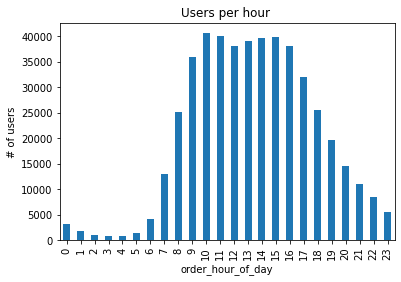

In [ ]:
#print(instacart_orders.groupby(["order_hour_of_day"])["user_id"].count())
users_per_hour = instacart_orders.groupby(["order_hour_of_day"])["user_id"].count()

users_per_hour.plot(kind="bar", ylabel="# of users", title = "Users per hour ")
#instacart_orders.plot(title='Clientes con pedidos por hora del dia',
#        x='order_hour_of_day',
#        y='count',
#        kind="bar",       
#        xlabel='Hora del día',
#        ylabel='Clientes con pedidos',
#        rot=45) 


#plt.show()

Escribe aquí tus conclusiones
* A partir delas 7 am empiezan a aumentar los pedidos a decenas de miles, luego las horas horas con mas pedidos son la 10hr y 11hr de la mañana de 12hr a 16hr no hay mucha variacion y a partir de las 17hr empiezan a disminuir y a partir de las 22hrs vuelven al rango de miles.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Orders per day '}, xlabel='order_dow', ylabel='# of orders'>

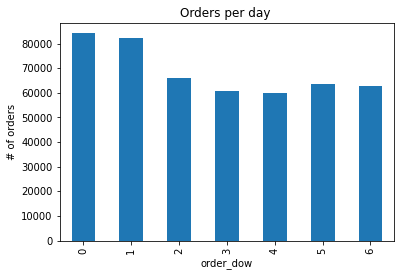

In [ ]:
#print(instacart_orders.groupby(["order_dow"])["user_id"].count())

orders_days = instacart_orders.groupby(["order_dow"])["user_id"].count()

orders_days.plot(kind="bar", ylabel="# of orders", title = "Orders per day ")

#instacart_orders.plot(title='Clientes por dia',
#        x='order_dow',
#        y='user_id',
#        kind="bar",       
#        xlabel='Día',
#        ylabel='Clientes',
#        rot=45) 


#plt.show()


Escribe aquí tus conclusiones
* Los dias con mas compras son el domingo y el lunes. El dia con menos compras es el jueves y los demas dias tienen casi la misma cantidad de compras.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'# of days before next order'}, xlabel='days_since_prior_order', ylabel='# of orders'>

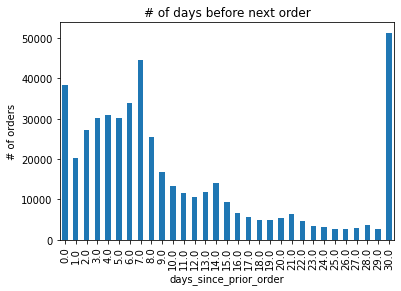

In [ ]:
#print( instacart_orders.groupby(["days_since_prior_order"])["user_id"].count().sort_values())

#next_order =  instacart_orders.groupby(["days_since_prior_order"])["user_id"].count().sort_values()
next_order =  instacart_orders.groupby(["days_since_prior_order"])["user_id"].count().sort_index()
#print(next_order)

next_order.plot(kind="bar", ylabel="# of orders", title = "# of days before next order")

#instacart_orders.plot(title='Días de espera hasta siguiente pedido',
#        x='days_since_prior_order',
#        y='oder_id',
#        kind="bar",       
#        xlabel='Dias',
#        ylabel='Pedidos',
#        rot=45) 


#plt.show()





Escribe aquí tus conclusiones
* La mayoria de los clientes suelen esperar minimo 7 dias antes de su siguiente pedido y maximos 30 dias.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
#wed_orders= instacart_orders[instacart_orders["order_dow"]==3]
#print(wed_orders)
#print( wed_orders.groupby(["order_hour_of_day"])["order_id"].count().sort_values())
#sat_orders= instacart_orders[instacart_orders["order_dow"]==6]
#print(wed_orders)
#print( sat_orders.groupby(["order_hour_of_day"])["order_id"].count().sort_values())
days = [3 , 6]
wed_sat_orders = instacart_orders[instacart_orders["order_dow"].isin(days)][["order_hour_of_day", "order_dow","order_id"]]
# print(wed_sat_orders)
pivot_days_table = wed_sat_orders.pivot_table(index='order_hour_of_day',
                            columns='order_dow',
                            values='order_id',
                            aggfunc='count'
                           )
print(pivot_days_table)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


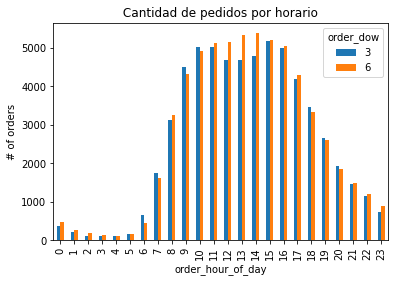

In [ ]:
pivot_days_table.plot(kind="bar", ylabel="# of orders", title = " Cantidad de pedidos por horario ")
plt.show()

Escribe aquí tus conclusiones
* Se puede ver como para ambos dias la mayor cantidad de pedidos se hacen entre las 10 y las 16 hrs.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:title={'center':' Distribucion de # de pedidos por cliente'}, ylabel='Frequency'>

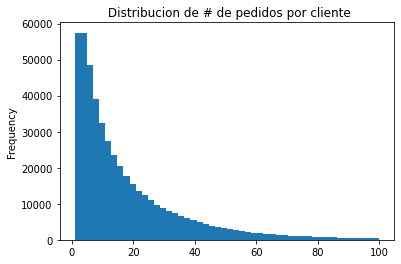

In [ ]:
instacart_orders["order_number"].plot(kind="hist", bins= 50, title =" Distribucion de # de pedidos por cliente", ylabel="Pedidos")

Escribe aquí tus conclusiones
* La mayoria de los clientes tienen mas de 100 pedidos 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
print(order_products.groupby(["product_id"]).count().sort_values(by="reordered", ascending=False).head(20))# extraigo la lista de los 20 productos mas pedidos

products_id = [24852,13176,21137,21903,47209,47766,47626,16797,26209,27845,27966,22935,24964,45007,39275,49683,28204,5876,8277,40706]# asigno la lista de ids del tp 20
print()
print(products[products["product_id"].isin(products_id)][["product_id","product_name"]])# busco el tops 20 en la lista de productos para saber su nombre


            order_id  add_to_cart_order  reordered
product_id                                        
24852          66050              66050      66050
13176          53297              53297      53297
21137          37039              37039      37039
21903          33971              33971      33971
47209          29773              29773      29773
47766          24689              24689      24689
47626          21495              21495      21495
16797          20018              20018      20018
26209          19690              19690      19690
27845          19600              19600      19600
27966          19197              19197      19197
22935          15898              15898      15898
24964          15292              15292      15292
45007          14584              14584      14584
39275          13879              13879      13879
49683          13675              13675      13675
28204          12544              12544      12544
5876           12232           

Escribe aquí tus conclusiones
* Todo indica que las frutas y verduras son el top 20, sobre todo las organicas

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

8.533887406554049


<AxesSubplot:title={'center':' Distribucion de # de articulos por pedido'}, ylabel='Frequency'>

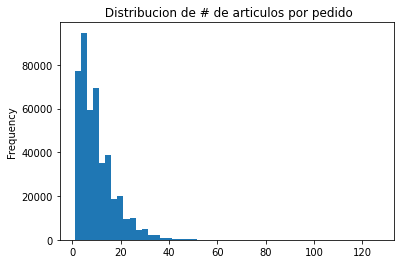

In [ ]:
print(order_products["add_to_cart_order"].mean())
products_dist = order_products.groupby("order_id")["product_id"].count()

products_dist.plot(kind="hist", bins= 50, title =" Distribucion de # de articulos por pedido", ylabel="Pedidos")

Escribe aquí tus conclusiones
* En promedio las personas suelen comprar 8 articulos por pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
order_products_top = order_products[order_products["reordered"]==1]
#print(order_products_top)
#print(order_products.groupby(["product_id"]).count().sort_values(by="reordered", ascending=False).head(20))# extraigo la lista de los 20 productos mas pedidos
top_20 = order_products_top.groupby(["product_id"]).count().sort_values(by="reordered", ascending=False).head(20)["order_id"]
#products_id = [24852,13176,21137,21903,47209,47766,47626,16797,26209,27845,27966,22935,24964,45007,39275,49683,28204,5876,8277,40706]# asigno la lista de ids del tp 20
#print(top_20)
print(products[products["product_id"].isin(top_20.index)][["product_id","product_name"]])# busco el tops 20 en la lista de productos para saber su nombre


       product_id              product_name
5875         5876             ORGANIC LEMON
8276         8277  APPLE HONEYCRISP ORGANIC
13175       13176    BAG OF ORGANIC BANANAS
16796       16797              STRAWBERRIES
21136       21137      ORGANIC STRAWBERRIES
21902       21903      ORGANIC BABY SPINACH
22934       22935      ORGANIC YELLOW ONION
24851       24852                    BANANA
24963       24964            ORGANIC GARLIC
26208       26209                     LIMES
27844       27845        ORGANIC WHOLE MILK
27965       27966       ORGANIC RASPBERRIES
28203       28204        ORGANIC FUJI APPLE
39274       39275       ORGANIC BLUEBERRIES
45006       45007          ORGANIC ZUCCHINI
47208       47209      ORGANIC HASS AVOCADO
47625       47626               LARGE LEMON
47765       47766           ORGANIC AVOCADO
49234       49235       ORGANIC HALF & HALF
49682       49683            CUCUMBER KIRBY


Escribe aquí tus conclusiones

* El top 20 es un conjunto en su mayoria de productos organicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
print(order_products.groupby(["product_id"]).mean()["reordered"])

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


Escribe aquí tus conclusiones
* Los productos con el valor de reordered mas cercano a 1 son los que se suelen pedir con mas frecuencia

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
#print(order_products.groupby("order_id")["reordered"].mean())
orders_and_oproducts = instacart_orders.merge(order_products ,on ="order_id")
#print(orders_and_oproducts)
print(orders_and_oproducts.groupby("user_id")["reordered"].mean())


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escribe aquí tus conclusiones
* Hay varios clientes que nunca habian pedido ciertos productos mientras que hay otros que suelen repetir sus productos ( los que tienen valor de 1)

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
op = order_products
first = op[(op["add_to_cart_order"]==1)]# identifico solo los productos que se pusieron primero
print(first.groupby("product_id").count().sort_values(by="reordered", ascending=False).head(20))# agrupo por id del producto de solo lso que se pusieron primero y cuento cuantas veces aparecieron
top20_1st = [196,5785,12341,13176,16797,19660,21137,21903,24852,26209,27086,27845,27966,38689,43352,44632,47209,47626,47766,49235]
print(products[products["product_id"].isin(top20_1st)][["product_id","product_name"]])


            order_id  add_to_cart_order  reordered
product_id                                        
24852          15562              15562      15562
13176          11026              11026      11026
27845           4363               4363       4363
21137           3946               3946       3946
47209           3390               3390       3390
21903           3336               3336       3336
47766           3044               3044       3044
19660           2336               2336       2336
16797           2308               2308       2308
27966           2024               2024       2024
44632           1914               1914       1914
49235           1797               1797       1797
47626           1737               1737       1737
196             1733               1733       1733
38689           1397               1397       1397
26209           1370               1370       1370
12341           1340               1340       1340
5785            1310           

Escribe aquí tus conclusiones
* Parece ser que los productos que primero ingresan al carrito son leche, berries, avocados y bananas, entre otras verduras y agua

### Conclusion general del proyecto:

#### 
Gracias al analisis y preporcesamiento de datos, se pudo limpiar y dar el formato adecuado a cada conjunto de datos. Para despues poder hacer los analisis correspondientes. Observando que los dias con mas compras son Domingo y Lunes, asi como las horas de 10 a 16hr. Y que los productos organicos son los mas comprados.